In [ ]:
!pip install --pre pycaret
!pip install autoviz
!pip install pycaret[mlops]
!pip install pycaret[analysis]
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 16.7 MB/s 
     |████████████████████████████████| 62 kB 804 kB/s 
     |████████████████████████████████| 2.0 MB 56.3 MB/s 
     |████████████████████████████████| 7.0 MB 42.5 MB/s 
     |████████████████████████████████| 72 kB 553 kB/s 
     |████████████████████████████████| 79.9 MB 118 kB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 106 kB 49.0 MB/s 
     |████████████████████████████████| 141 kB 45.9 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.4 MB 54.3 MB/s 
     |████████████████████████████████| 280 kB 68.1 MB/s 
     |████████████████████████████████| 1.5 MB 51.9 MB/s 
     |███████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.9 MB/s 
     |████████████████████████████████| 3.2 MB 62.9 MB/s 
     |████████████████████████████████| 1.7 MB 36.5 MB/s 
     |████████████████████████████████| 16.4 MB 44.7 MB/s 
     |████████████████████████████████| 240 kB 68.6 MB/s 
     |████████████████████████████████| 12.9 MB 57.8 MB/s 
     |████████████████████████████████| 55 kB 5.6 MB/s 
     |████████████████████████████████| 18.5 MB 79.8 MB/s 
     |████████████████████████████████| 121 kB 55.2 MB/s 
     |████████████████████████████████| 83 kB 2.8 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=347ca47c12838e71e0bfe72bbad70a2693d5b2239ce9b1d1ab7c08d6cc77df19
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
  Attempting uninstall: bokeh
    Found exi

In [ ]:
#

In [ ]:
#Descomprimir el archivo en este caso RAR con !unrar x 'Path del archivo' 'Path de la carpeta destino'
!unrar x '/content/drive/MyDrive/Colab Notebooks/U_DS_Projects_Data Analysis & ML/P3-Gold Prices Analysis & Forecasting/Gold+price+data.rar' '/content/sample_data'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/U_DS_Projects_Data Analysis & ML/P3-Gold Prices Analysis & Forecasting/Gold+price+data.rar

Extracting  /content/sample_data/data.csv                                 97%  OK 
All OK


##Proyect with Statsmodels and Pmdarima

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
data = pd.read_csv('/content/sample_data/data.csv', index_col='date',parse_dates=True)

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 818 entries, 1950-01-01 to 2018-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   818 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


,price
date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [ ]:
data.tail()

,price
date,
2017-10-01,1280.677
2017-11-01,1283.189
2017-12-01,1265.674
2018-01-01,1332.809
2018-02-01,1333.775


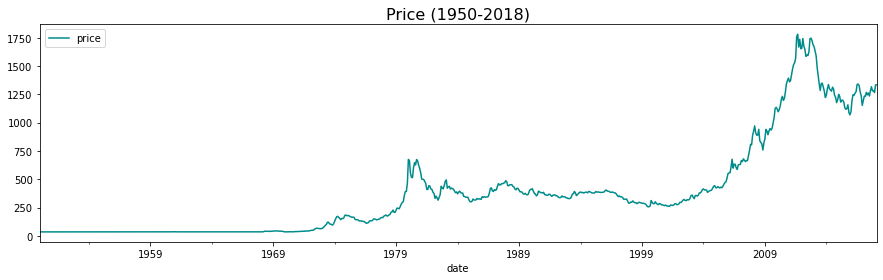

In [ ]:
data.plot(figsize=(15,4), color='darkcyan')
plt.title('Price (1950-2018)',fontsize=16)
plt.show()

In [ ]:
start_date = '2009-01-01'
end_date = '2018-01-01'
mask = (data.index >= start_date) & (data.index < end_date)
data = data.loc[mask]

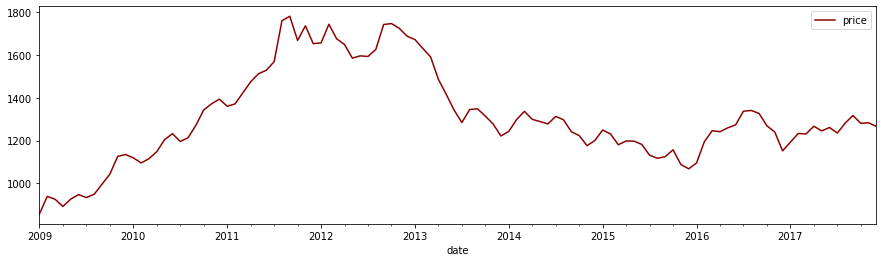

In [ ]:
data.index.freq = 'MS'
data.plot(figsize = (15,4), color='darkred')
plt.show()

In [ ]:
datayearly = data.rolling(window=12).mean()

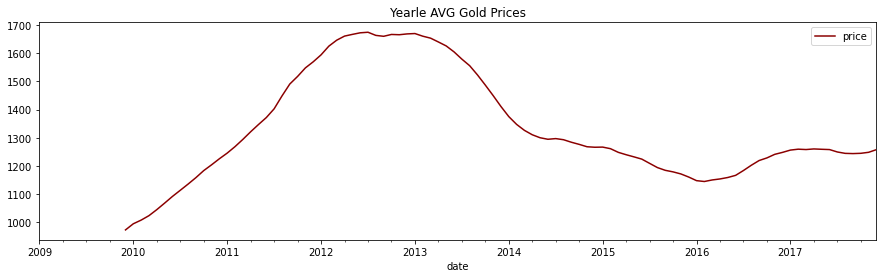

In [ ]:
datayearly.plot(title='Yearle AVG Gold Prices', color='darkred', figsize=(15,4))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
  result = adfuller(series, autolag='AIC')
  labels = ['ADF Test Statistic', 'p value', '# lags used','# observations']
  out = pd.Series(result[0:4], index=labels)
  print(out.to_string())
  if result [1] <= 0.05:
    print('Reject the null hypthesis')
    print('Data has no unit root and stationary')
  else:
    print('Fail to reject the null hypothesis')
    print('Data has a unit root and non-stationary')

In [ ]:
adf_test(data['price'])

ADF Test Statistic     -2.133761
p value                 0.231158
# lags used             5.000000
# observations        102.000000
Fail to reject the null hypothesis
Data has a unit root and non-stationary


In [ ]:
pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 41.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
from pmdarima import auto_arima
arima_fit = auto_arima(data['price'],
                       start_P=0, start_Q=0,
                       max_P=10, max_Q=10,
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1861.677, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1150.780, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1152.045, Time=0.89 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1148.396, Time=0.92 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1152.930, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1149.835, Time=1.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1473.891, Time=0.07 sec
 ARIMA(

In [ ]:
import statsmodels.api as sm 
model = sm.tsa.arima.ARIMA(data['price'],
                           order=(1,0,1))

In [ ]:
modelresults = model.fit()

In [ ]:
fcast = modelresults.predict(start = len(data), 
                             end=len(data) + 24,
                             typ = ('levels'))
fcast = fcast.rename('ARIMA 1,0,1 Forecast')

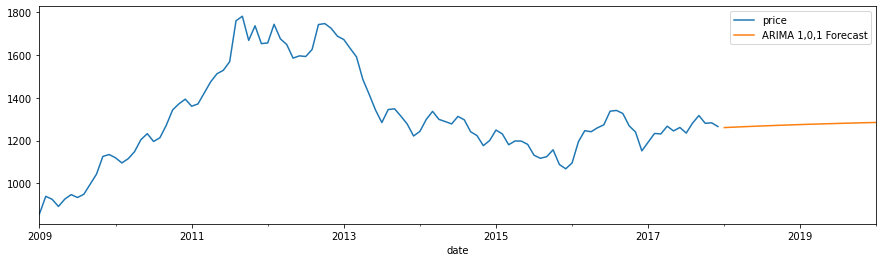

In [ ]:
data['price'].plot(figsize=(15,4),legend=True)
fcast.plot(legend=True)

# Proyect using AutoML with Pycaret

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pycaret.time_series import * 

In [ ]:
df = pd.read_csv('/content/sample_data/data.csv')

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    818 non-null    datetime64[ns]
 1   price   818 non-null    float64       
 2   MA12    807 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 19.3 KB


,date,price,MA12
0,1950-01-01,34.73,NaN
1,1950-02-01,34.73,NaN
2,1950-03-01,34.73,NaN


In [ ]:
df.describe()

,price
count,818.000000
mean,381.194630
std,418.855501
min,34.490000
25%,35.189250
50%,303.033500
75%,422.873750
max,1780.648000


In [ ]:
df['MA12'] = df['price'].rolling(12).mean()

In [ ]:
import plotly.express as px
fig = px.line( df, x='date',y= ['price','MA12'], template= 'plotly_dark')
fig.show()

In [ ]:
df['Month'] = [i.month for i in df['date']]
df['Year'] = [i.year for i in df['date']]

In [ ]:
df['Series'] = np.arange(1, len(df) + 1)

In [ ]:
df.drop(['date','MA12'], inplace=True, axis=1)

In [ ]:
df = df[['Series','Year','Month','price']]
df.head()

,Series,Year,Month,price
0,1,1950,1,34.73
1,2,1950,2,34.73
2,3,1950,3,34.73
3,4,1950,4,34.73
4,5,1950,5,34.73


In [ ]:
df.tail()

,Series,Year,Month,price
813,814,2017,10,1280.677
814,815,2017,11,1283.189
815,816,2017,12,1265.674
816,817,2018,1,1332.809
817,818,2018,2,1333.775


In [ ]:
train = df[df['Year'] < 2010]
test = df[df['Year'] >= 2010]

In [ ]:
from pycaret.regression import *
ctr1 = setup(data=train,
             test_data = test,
             target='price',
             fold_strategy = 'timeseries'                          
             )

,Description,Value
0,Session id,4886
1,Target,price
2,Target type,Regression
3,Data shape,"(818, 4)"
4,Train data shape,"(720, 4)"
5,Test data shape,"(98, 4)"
6,Numeric features,3
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [ ]:
compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,80.8663,22995.3443,96.6977,-1.8251,0.3326,0.2128,0.0730
rf,Random Forest Regressor,80.9355,23019.3924,97.2449,-2.5483,0.3348,0.2133,0.1850
knn,K Neighbors Regressor,81.0183,23017.0525,97.2752,-10.3905,0.3367,0.2154,0.0300
et,Extra Trees Regressor,81.2173,23052.6654,97.0518,-3.7019,0.3332,0.2135,0.1390
dt,Decision Tree Regressor,82.2774,23154.2431,99.3812,-2.1246,0.3383,0.2162,0.0290
lightgbm,Light Gradient Boosting Machine,83.5588,24774.9198,98.1103,-2.4390,0.3524,0.2228,0.0430
ada,AdaBoost Regressor,85.2209,27966.6849,99.7585,-1.4875,0.3497,0.2194,0.0500
lr,Linear Regression,97.6977,24355.7296,113.2017,-9.6996,0.4082,0.2833,0.0500
lasso,Lasso Regression,97.9791,24465.7565,113.4852,-6.9544,0.4086,0.2837,0.0500
en,Elastic Net,97.9866,24465.6396,113.4881,-8.2332,0.4087,0.2839,0.0450


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=4886)

In [ ]:
gbr= create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1157,0.0392,0.1979,-0.3418,0.0055,0.0033
1,0.0373,0.0023,0.0481,-0.8878,0.0013,0.0011
2,3.1044,19.1028,4.3707,-0.9980,0.1108,0.0753
3,78.3005,7635.8020,87.3831,-4.0700,1.0048,0.5808
4,225.9275,76475.9782,276.5429,-2.0038,0.9680,0.5245
5,51.1689,3608.8054,60.0733,-0.2203,0.1540,0.1327
6,79.8645,7239.5620,85.0856,-7.3645,0.2106,0.2209
7,33.9633,1651.1310,40.6341,-0.0637,0.1206,0.1039
8,38.0050,2611.2203,51.1001,-0.1749,0.1540,0.1115


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1503,0.0502,0.2240,-0.7191,0.0062,0.0043
1,0.0520,0.0037,0.0610,-2.0392,0.0017,0.0015
2,3.1954,19.7364,4.4426,-1.0643,0.1128,0.0777
3,83.7652,8524.0649,92.3259,-4.6597,1.1235,0.6319
4,257.8553,91947.8811,303.2291,-2.6115,1.1968,0.6317
5,81.3966,9425.0973,97.0829,-2.1870,0.2629,0.1947
6,27.2506,1327.1028,36.4294,-0.5333,0.0951,0.0691
7,56.2352,4119.5304,64.1836,-1.6540,0.1874,0.1504
8,42.9517,3793.3307,61.5900,-0.7068,0.1907,0.1214


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predict_model(tuned_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,241.4175,93314.7106,305.4746,-1.5810,0.2293,0.1641


,Series,Year,Month,price,prediction_label
720,721.0,2010.0,1.0,1119.574951,1103.357714
721,722.0,2010.0,2.0,1095.800049,1112.289882
722,723.0,2010.0,3.0,1115.553955,1113.665972
723,724.0,2010.0,4.0,1148.474976,1105.888173
724,725.0,2010.0,5.0,1204.321045,1105.888173
...,...,...,...,...,...
813,814.0,2017.0,10.0,1280.677002,1109.865680
814,815.0,2017.0,11.0,1283.188965,1122.875743
815,816.0,2017.0,12.0,1265.673950,1126.238840
816,817.0,2018.0,1.0,1332.808960,1103.357714


In [ ]:
predictions = predict_model(tuned_gbr,data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,33.7648,11270.2836,106.1616,0.9357,0.0859,0.0406


In [ ]:
predictions['Date'] = pd.date_range(start='1950-01-01', 
                                    end='2018-02-01',
                                    freq='MS'
                                    )

In [ ]:
predictions.tail()

,Series,Year,Month,price,prediction_label,Date
813,814.0,2017.0,10.0,1280.677002,1109.865680,2017-10-01
814,815.0,2017.0,11.0,1283.188965,1122.875743,2017-11-01
815,816.0,2017.0,12.0,1265.673950,1126.238840,2017-12-01
816,817.0,2018.0,1.0,1332.808960,1103.357714,2018-01-01
817,818.0,2018.0,2.0,1333.775024,1112.289882,2018-02-01


In [ ]:
fig = px.line(data_frame=predictions, 
              x='Date',
              y=['price','prediction_label'],
              template='plotly_dark'
              )
fig.add_vrect(x0='2010-01-01',
              x1='2018-02-01',
              fillcolor='grey',
              opacity=0.3,
              line_width=0
              )
fig.show()